 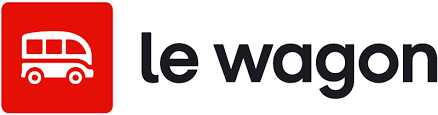

# Greenweez Retention Matrix


In this challenge, we will study the impact of COVID-19 on Greenweez, with a focus on customer retention.



There have been 3 lockdowns in France during the COVID-19 pandemic:


- **March 17 to May 11, 2020**, i.e. 1 month and 25 days;
- **October 30 to December 15, 2020**, i.e. 1 month and 15 days;
- **April 3 to May 3, 2021**, i.e. 28 days.

## Turnover Analysis


### Yearly Analysis



Load Greenweez orders by executing the following cell. \
It may take a few minutes to execute

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT * FROM `data-analytics-bootcamp-363212.course30.gwz_orders` ORDER BY date_date"

df_orders = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")

Convert the column `date_date` to **datetime**.


In [ ]:
#your code here

Set the column `date_date` as index

In [ ]:
#your code here

Calculate the total turnover per year using the `.resample()` method and store the results in a DataFrame `df_y_turnover`.

In [ ]:
#your code here

Calculate the evolution evolution of revenue for:

- 2021 vs 2020
- 2021 vs 2019

What was the impact of the pandemic on Greenweez revenues ?

<u>Hint:</u> the `.pct_change()` method can help you.

In [ ]:
#your code here

In [ ]:
#your code here

> **Your Answer Here (Double click)**

---

Let's dive deeper in the analysis to assess if the turnover increase comes from new customers or from an increase of the average basket.

### Order values analysis




Calculate the total turnover per month and store the results in a DataFrame `df_m_turnover`.

In [ ]:
#your code here

Plot the result using **Plotly Express**. 📈 \
Can you identify a peak in this chart? On which month?

In [ ]:
#your code here

> **Your Answer Here (Double click)**

Plot a similar chart showing the **average** turnover instead. What do you notice?

In [ ]:
#your code here

> **Your Answer Here (Double click)**

### Customer base analysis


We will consider that a customer is new at the moment he places his first order. \
What does the following line of code do?


In [ ]:
df_first_orders = df_orders.reset_index().groupby("customers_id", as_index=False).first()
df_first_orders

> **Your Answer Here (Double click)**

From `df_first_orders`, compute the number of new customers per month. Store the results in a new DataFrame called`df_new_customers`.


<details>
    <summary> Hint 🔍</summary>

No need to set the date_date column as index, you can use the "on" parameter of the `resample()` function
</details>



In [ ]:
#your code here

Plot the number of new customers in a graph with **Plotly Express**.

Which months have the most new customers ? Why do we have so many new users before July 2019?

In [ ]:
#your code here

> **Your Answer Here (Double click)**

What can you conclude about the impact of COVID-19 on turnover?

> **Your Answer Here (Double click)**

## Retention Matrix

We will now study the customer retention to go gain additional insights on our previous findings. \
To do so, we will do a **cohort analysis**.

---

### Data Transformation

We won't need to resample our data anymore.

Use the `.reset_index()` method on `df_orders` to bring back `date_date` as column.



In [ ]:
#your code here


Change the `date_date` column name in `df_first_orders` to `member_at`.

<details>
    <summary> Hint 🔍</summary>

Have a look at the `.rename()`method and find out how to change column names in a DataFrame.
    
    
</details>


In [ ]:
#your code here

Add the `member_at` column to `df_orders`.

You will need to merge `df_orders` and `df_first_orders` together. When merging, keep only `customers_id` and `member_at` to avoid duplicate columns.

Store the result in a `df_cohort` DataFrame.

In [ ]:
#your code here

We will create our cohorts based on the month of `member_at`. \
Note that since it is a **datetime** column, we can cast it to a specific format like **datetime64[M]**.

Execute the following cell and try to understand what it did.

In [ ]:
df_cohort["cohort"] = df_cohort["member_at"].values.astype('datetime64[M]')
df_cohort[["member_at", "cohort"]]

Compute the number of unique users per cohort. You can use the `.nunique()`aggregator to do so.

Store the results in a **Series** variable named `cohort_size`.


In [ ]:
#your code here

We need to exclude orders from December 2021 from our analysis since we don't have all of them. \
We will also only consider orders made by customers who became members after 2019.

Do the appropriate filtering on `df_cohort` and `df_cohort_size`.

<details>
    <summary> Hint 🔍</summary>

You need to use `boolean indexing`or the `loc`function
    
    
</details>


In [ ]:
#filter df_cohort

In [ ]:
#filter df_cohort_size


---

We will define a customer as active when they place an order. We will also consider a customer as active after its **second** order.


Filter `df_cohort` on `date_date` > `member_at`

In [ ]:
#your code here

Look at the cell below and comment on what it does, then execute it.


In [ ]:
import numpy as np

df_cohort["nb_months"] = (df_cohort["date_date"] - df_cohort["member_at"]) / np.timedelta64(1,'M')
df_cohort["nb_months"] = df_cohort["nb_months"].astype(int) + 1
df_cohort

### Matrix creation


To create a rentention matrix, we will have to count the number of unique `customers_id` by `cohort` and `nb_months`. \
Do it and store the result in a `df_retention` DataFrame.


Don't forget to use **as_index=False** in the `groupby()` function as we don't want to set `cohort` and `nb_months` as indexes.

In [ ]:
#your code here

Using `df_retention`, create a **pivot table** with `cohort` as index and `nb_months` as columns. \
Store it in a variable named `retention_matrix`.


In [ ]:
#your code here

This result is what we call a retention matrix:
- Each row represents the number of users from a specific cohort who remain active in months 1, 2, 3, ..., X following their initial purchase.
- Each column represents the number of users who are still active in month X after their first purchase, considering different cohorts.


---

Results can be hard to read when not represented as a percentage of active users.

We need to divide those values by the `df_cohort_size` variable we calculated earlier. \
Since we are not dividing by a simple value but by a `Series` indexed by a date, you will need to use the `.div()` function.

<u>Note:</u> Make sure to choose the correct *axis* parameter



In [ ]:
#your code here

Congratulations ! You just created your first retention Matrix with Python ! 🚀

### Matrix visualisation

Execute the following cell to view the Retention Matrix and gain insights from the graphical representation.

In [ ]:
import plotly.express as px

fig = px.imshow(retention_matrix, text_auto=".0%")
fig.show()

What can you conclude ?

> **Your Answer Here (Double click)**